Imports


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial

Question 1:
Assuming sparse Hopfield network $\xi^\mu_i=\{0,1\}$ plot dependency of memory capacity on
sparsity parameter f . Assume that memory is recovered, if overlap is 90%. Compare it with
Hopfield network capacity.

## Hopfield Network

In [ ]:
Neurons=1000
nIteration=100
matrice=np.zeros((250,))
for Patterns in range (5,250,5):
  for it in range (nIteration):
    xi=(np.random.rand(Neurons,Patterns)>0.5)*2-1
    J=xi.dot(xi.T)
    s=xi[:,0]*((np.random.rand(Neurons,)>0.25)*2-1)
    for k in range(20):
      h=J.dot(s)
      s=np.sign(h)
    s1=s
    matrice[Patterns]+=s.dot(xi)[0]/Neurons

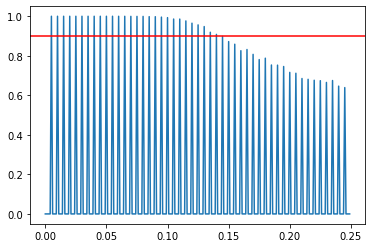

In [ ]:
plt.plot(np.arange(250)/Neurons,matrice/nIteration)
plt.axhline(y=0.9, color='r', linestyle='-')

Result: 140 patterns

### Sparsed Network with 0.1 sparsity

In [ ]:
Neurons=1000
fSparse=0.1
T=0.5
nIterations =100
matrice=np.zeros((250,))
matrice[0] = np.nan


for Patterns in range (1,matrice.shape[0],50):
  for it in range(nIterations):
    xi= (np.random.rand(Neurons,Patterns)<fSparse)+0.0
    J=(xi-fSparse).dot((xi-fSparse).T) 
    cr=1
    s=xi[:,0]*cr+(1-xi[:,0])*(1-cr)
    for k in range(20):
      h=J.dot(s)/Neurons/fSparse/(1-fSparse)
      s = np.heaviside(h-T, 0)
    s1=s
    matrice[Patterns]+=xi[:,0].T.dot(s)/Neurons/fSparse
    

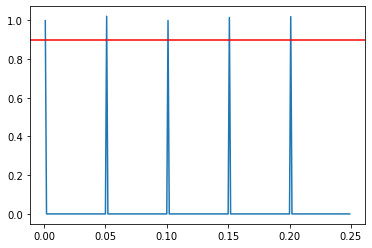

In [ ]:
plt.plot(np.arange(250)/Neurons,matrice/nIterations)
plt.axhline(y=0.9, color='r', linestyle='-')

## Different Sparse Value and Overlap

overlap: 0.696 
 sparsity parameter 0.95


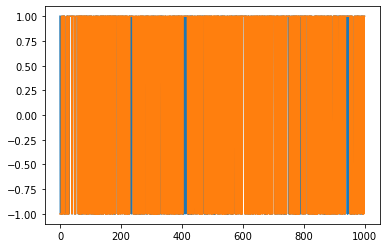

overlap: 0.72 
 sparsity parameter 0.9555555555555555


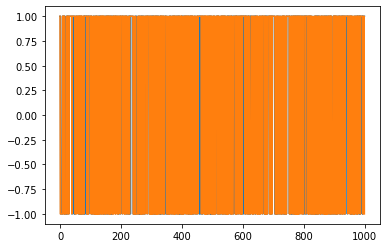

overlap: 0.656 
 sparsity parameter 0.961111111111111


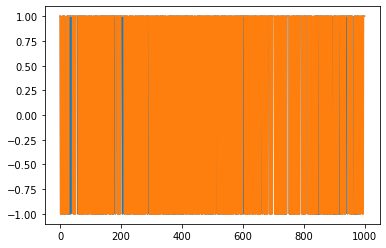

overlap: 0.748 
 sparsity parameter 0.9666666666666667


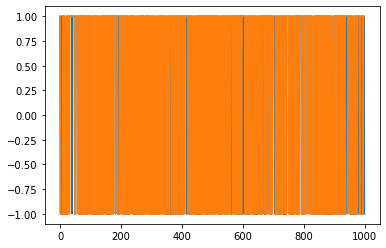

overlap: 0.696 
 sparsity parameter 0.9722222222222222


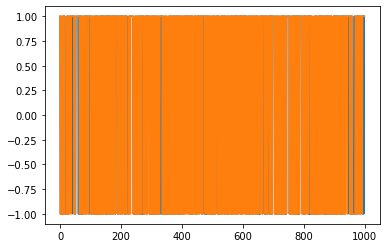

overlap: 0.824 
 sparsity parameter 0.9777777777777777


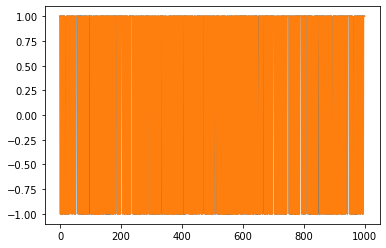

overlap: 0.702 
 sparsity parameter 0.9833333333333333


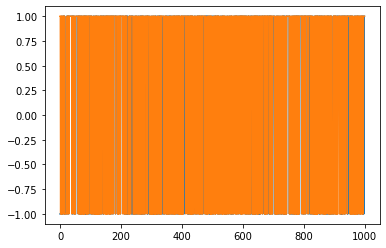

overlap: 0.872 
 sparsity parameter 0.9888888888888889


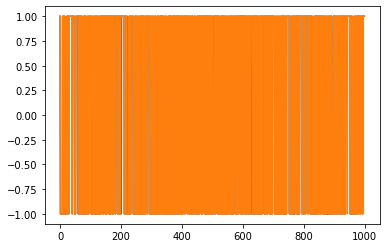

overlap: 0.786 
 sparsity parameter 0.9944444444444445


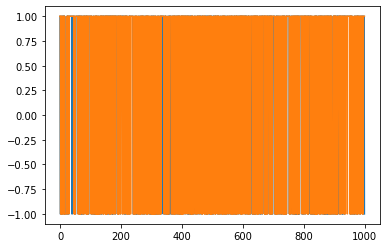

overlap: 1.0 
 sparsity parameter 1.0


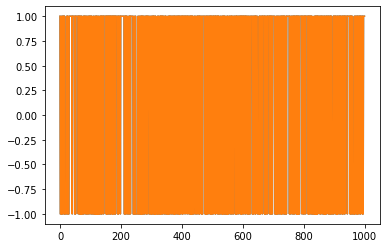

In [ ]:
N=1000
for fSparse in np.linspace(0.95, 1, 10):
  xiS = (np.random.rand(N,) < fSparse) + 0.
  xiT = (np.random.rand(N,) < fSparse) + 0.

  s = xiS
  nIterations = 100

  for smthg1 in range(nIterations):
      s = np.sign(J.dot(s))
  sFix= s

  s = xiT
  for smthg2 in range(nIterations):
      s = np.sign(J.dot(s))
  tFix = s
  overlap = sFix.dot(tFix)/N
  print(f"overlap: {overlap} \n sparsity parameter {fSparse}")
  plt.plot(np.arange(N), sFix, np.arange(N), tFix)
  plt.show()

## Overlap 90%

overlap: 0.848 
 sparsity parameter 1.0


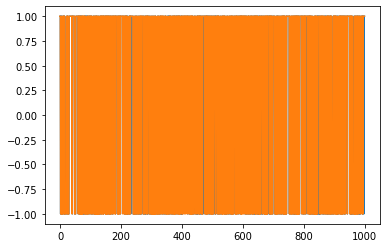

In [ ]:

xiS = (np.random.rand(N,) < 0.9944444444444445) + 0.
xiT = (np.random.rand(N,) < 0.9944444444444445) + 0.

s = xiS
nIterations = 100

for smthg1 in range(nIterations):
    s = np.sign(J.dot(s))
sFix= s

s = xiT
for smthg2 in range(nIterations):
    s = np.sign(J.dot(s))
tFix = s
overlap = sFix.dot(tFix)/N
print(f"overlap: {overlap} \n sparsity parameter {fSparse}")
plt.plot(np.arange(N), sFix, np.arange(N), tFix)
plt.show()

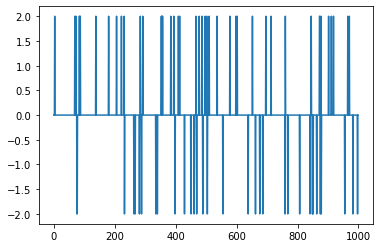

In [ ]:
plt.plot(sFix-tFix)